In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='darkgrid')


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('~/Desktop/Data sets ML/42674_74935_bundle_archive/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df['Spending Score (1-100)']


0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

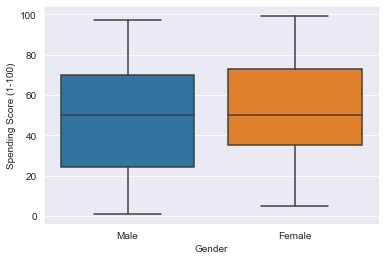

In [4]:
sns.boxplot(df['Gender'],df['Spending Score (1-100)'])

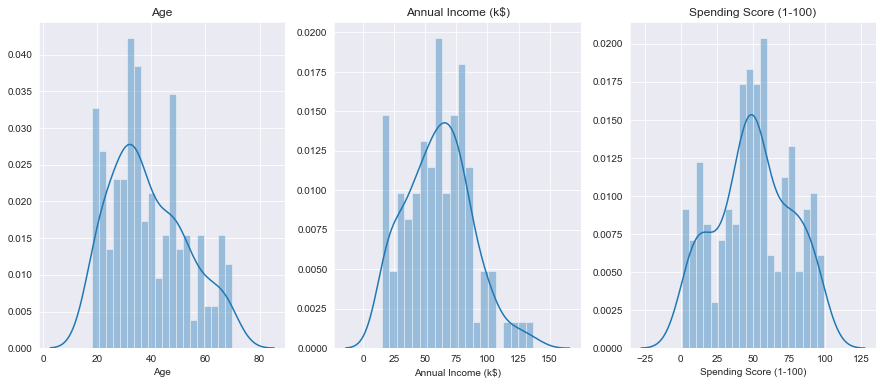

In [5]:
plt.figure(figsize=(15,6))
y=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    y+=1
    plt.subplot(1,3,y)
    sns.distplot(df[x],bins=20)
    plt.title(x,fontsize=12)
plt.show()
    
    

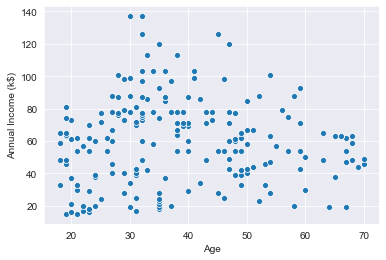

In [6]:

sns.scatterplot(df['Age'],df['Annual Income (k$)'])


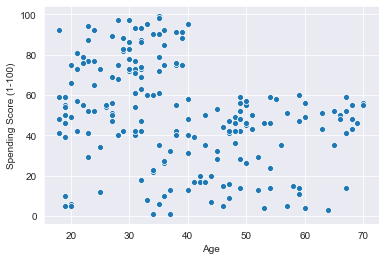

In [7]:
sns.scatterplot(df['Age'],df['Spending Score (1-100)'])

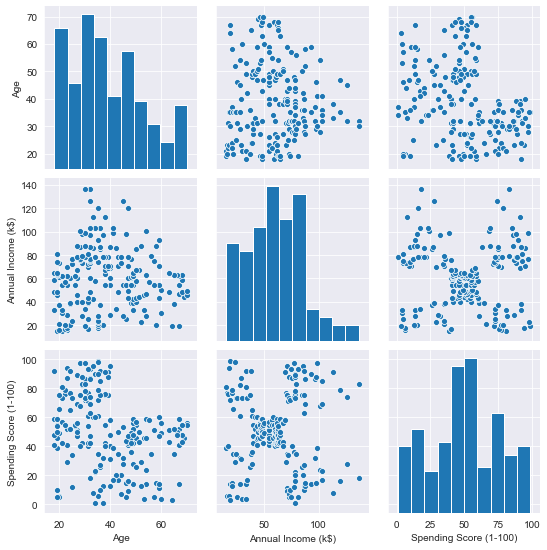

In [8]:
data=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
sns.pairplot(data)

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# # # Age and Annual Income (k$)

In [10]:
from sklearn.cluster import KMeans
X=df.iloc[:,2:4]
X.columns

Index(['Age', 'Annual Income (k$)'], dtype='object')

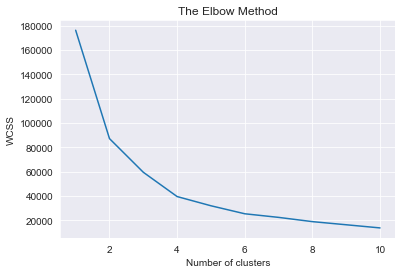

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=6,init='k-means++',
    n_init=10,
    max_iter=300,random_state=0)
pred=kmeans.fit_predict(X)

In [13]:
pred   #clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 4, 5, 4, 4, 5, 4, 4, 4, 5,
       4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5,
       5, 4, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 1, 1, 1, 5, 1, 1, 1, 4, 1, 1, 1,
       5, 1, 5, 1, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [14]:
kmeans.cluster_centers_

array([[ 27.72972973,  27.21621622],
       [ 36.8490566 ,  79.01886792],
       [ 52.9       ,  33.15      ],
       [ 36.6       , 109.7       ],
       [ 57.02564103,  56.82051282],
       [ 25.06451613,  59.48387097]])

In [15]:
X[pred==0]  #cluster 0

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
9,30,19
11,35,19


In [16]:
X['cluster']=pred

In [17]:
X.head()

,Age,Annual Income (k$),cluster
0,19,15,0
1,21,15,0
2,20,16,0
3,23,16,0
4,31,17,0


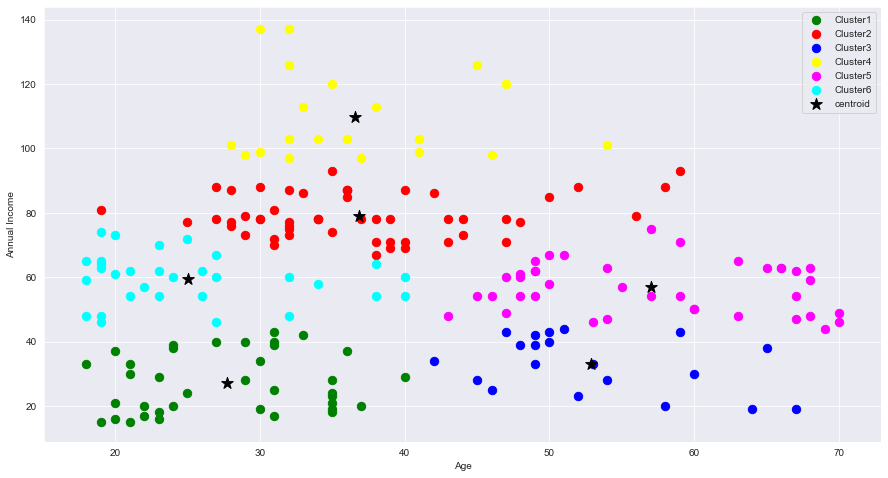

In [18]:
plt.figure(figsize=(15,8))
X1=X[X.cluster==0]
X2=X[X.cluster==1]
X3=X[X.cluster==2]
X4=X[X.cluster==3]
X5=X[X.cluster==4]
X6=X[X.cluster==5]
plt.scatter(X1['Age'],X1['Annual Income (k$)'],color='green',s=70,label='Cluster1')
plt.scatter(X2['Age'],X2['Annual Income (k$)'],color='red',s=70,label='Cluster2')
plt.scatter(X3['Age'],X3['Annual Income (k$)'],color='blue',s=70,label='Cluster3')
plt.scatter(X4['Age'],X4['Annual Income (k$)'],color='yellow',s=70,label='Cluster4')
plt.scatter(X5['Age'],X5['Annual Income (k$)'],color='magenta',s=70,label='Cluster5')
plt.scatter(X6['Age'],X6['Annual Income (k$)'],color='cyan',s=70,label='Cluster6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*',s=150,label='centroid')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()


## Age and Spending score

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
X=df.iloc[:,[2,4]]

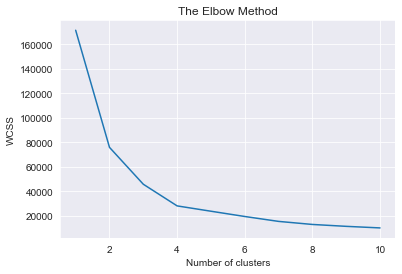

In [24]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,
    max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300)
pred1=kmeans.fit_predict(X)

In [27]:
pred1

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [28]:
kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

In [30]:
X['pred1']=pred1

In [31]:
X[X.pred1==0]

,Age,Spending Score (1-100),pred1
40,65,35,0
42,48,36,0
46,50,55,0
50,49,52,0
53,59,60,0
54,50,45,0
55,47,41,0
56,51,50,0
57,69,46,0
59,53,46,0


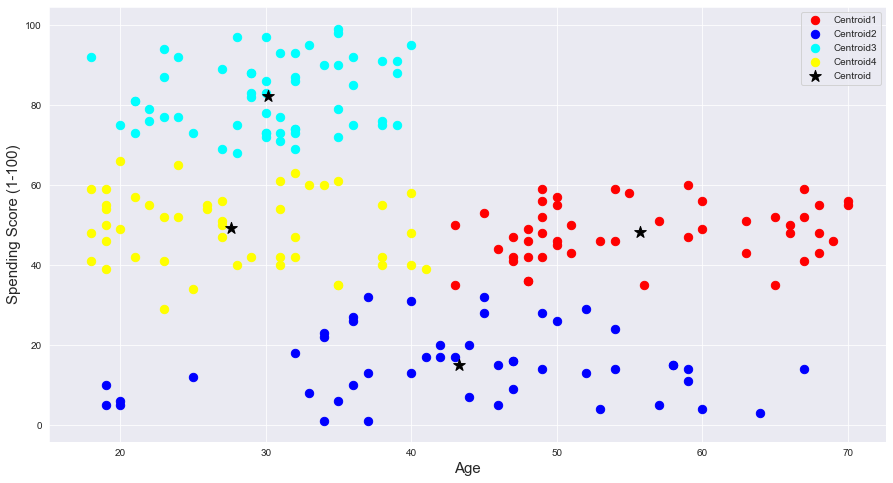

In [37]:
plt.figure(figsize=(15,8))
X1=X[X.pred1==0]
X2=X[X.pred1==1]
X3=X[X.pred1==2]
X4=X[X.pred1==3]
plt.scatter(X1['Age'],X1['Spending Score (1-100)'],s=70,label="Centroid1",color='red')
plt.scatter(X2['Age'],X2['Spending Score (1-100)'],s=70,label="Centroid2",color='blue')
plt.scatter(X3['Age'],X3['Spending Score (1-100)'],s=70,label="Centroid3",color='cyan')
plt.scatter(X4['Age'],X4['Spending Score (1-100)'],s=70,label="Centroid4",color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,color='black',marker='*',label='Centroid')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend()
plt.show()

In [39]:
X=df.iloc[:,2:]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


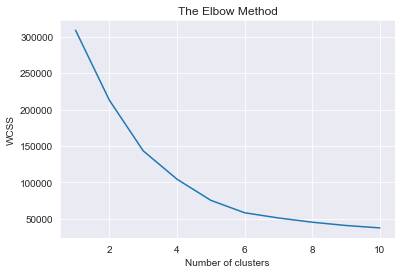

In [41]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300)
pred2=kmeans.fit_predict(X)
pred2

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 5, 4, 0, 2,
       0, 4, 5, 2, 2, 2, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 5, 2, 5, 5, 5, 2,
       5, 5, 2, 2, 5, 5, 5, 5, 5, 2, 5, 2, 2, 5, 5, 2, 5, 5, 2, 5, 5, 2,
       2, 5, 5, 2, 5, 2, 2, 2, 5, 2, 5, 2, 2, 5, 5, 2, 5, 2, 5, 5, 5, 5,
       5, 2, 2, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [44]:
X.shape

(200, 3)

In [47]:
centroid3=kmeans.cluster_centers_

In [53]:
import plotly as py
import cufflinks as clf
from plotly.offline import download_plotlyjs,iplot,plot,init_notebook_mode


In [54]:
init_notebook_mode(connected=True)
clf.go_offline()

In [55]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),pred2
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


In [58]:
import plotly.express as px
fig=px.scatter_3d(data_frame=X,x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',color='pred2')
fig.show()

- So finally we make the cutomer segmantaion of Mall dataset

In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [64]:
df.drop(columns='CustomerID',inplace=True)

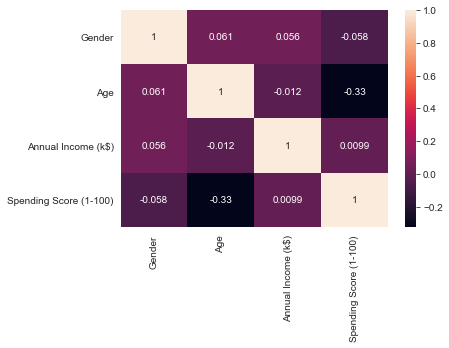

In [73]:
sns.heatmap(df.corr(),annot=True)
plt.show()

-  There isnt very good correlation between the Spending score and Annual income,Age and Gender.

### Silhouette Analysis
$silhouette score= \frac {p−q}{max(p,q)}$
 
- p  is the mean distance to the points in the nearest cluster that the data point is not a part of

- q  is the mean intra-cluster distance to all the points in its own cluster.

- The value of the silhouette score range lies between -1 to 1.

- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.



In [75]:
from sklearn.metrics import silhouette_score

In [76]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
 

For n_clusters=2, the silhouette score is 0.29290213278734206
For n_clusters=3, the silhouette score is 0.3835545203835916
For n_clusters=4, the silhouette score is 0.4049273439255358
For n_clusters=5, the silhouette score is 0.4447419502460821
For n_clusters=6, the silhouette score is 0.45419490523883554
For n_clusters=7, the silhouette score is 0.44119366097466156
For n_clusters=8, the silhouette score is 0.4325799265842136


# Hierachical Clustering

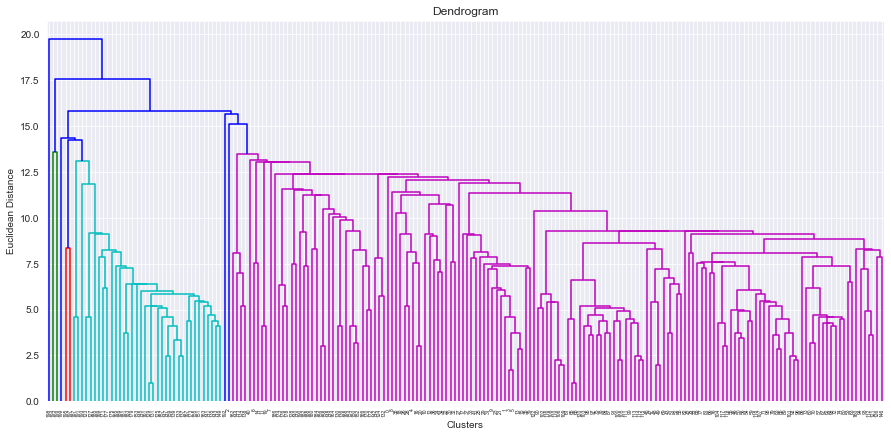

In [124]:
plt.figure(figsize=(15,7))
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [120]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean')
y_hc=hc.fit_predict(X)

In [121]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 0 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [122]:
X['pred']=y_hc

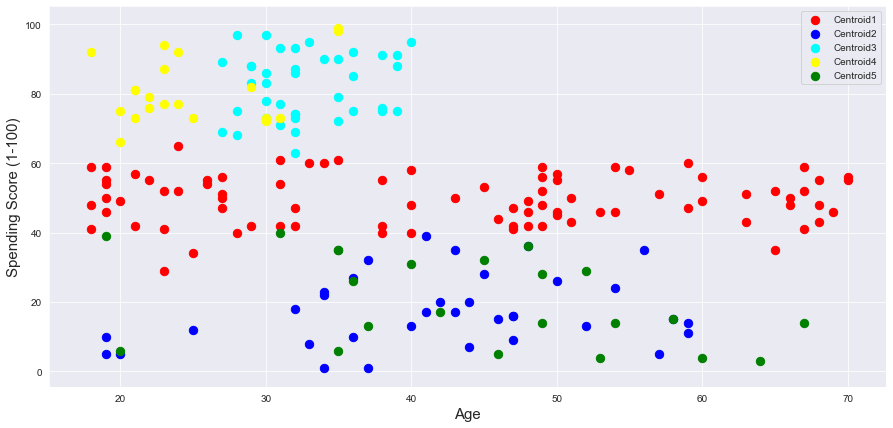

In [123]:
plt.figure(figsize=(15,7))
X1=X[X.pred==0]
X2=X[X.pred==1]
X3=X[X.pred==2]
X4=X[X.pred==3]
X5=X[X.pred==4]

plt.scatter(X1['Age'],X1['Spending Score (1-100)'],s=70,label="Centroid1",color='red')
plt.scatter(X2['Age'],X2['Spending Score (1-100)'],s=70,label="Centroid2",color='blue')
plt.scatter(X3['Age'],X3['Spending Score (1-100)'],s=70,label="Centroid3",color='cyan')
plt.scatter(X4['Age'],X4['Spending Score (1-100)'],s=70,label="Centroid4",color='yellow')
plt.scatter(X5['Age'],X5['Spending Score (1-100)'],s=70,label="Centroid5",color='green')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend()
plt.show()

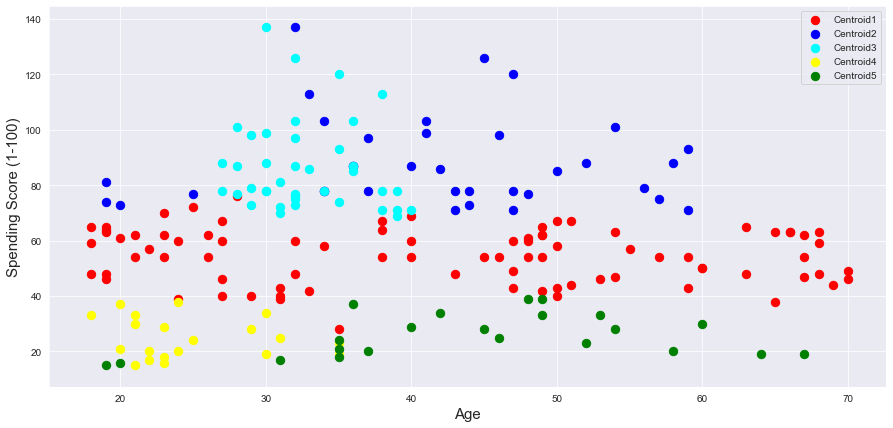

In [125]:
plt.figure(figsize=(15,7))
X1=X[X.pred==0]
X2=X[X.pred==1]
X3=X[X.pred==2]
X4=X[X.pred==3]
X5=X[X.pred==4]

plt.scatter(X1['Age'],X1['Annual Income (k$)'],s=70,label="Centroid1",color='red')
plt.scatter(X2['Age'],X2['Annual Income (k$)'],s=70,label="Centroid2",color='blue')
plt.scatter(X3['Age'],X3['Annual Income (k$)'],s=70,label="Centroid3",color='cyan')
plt.scatter(X4['Age'],X4['Annual Income (k$)'],s=70,label="Centroid4",color='yellow')
plt.scatter(X5['Age'],X5['Annual Income (k$)'],s=70,label="Centroid5",color='green')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend()
plt.show()

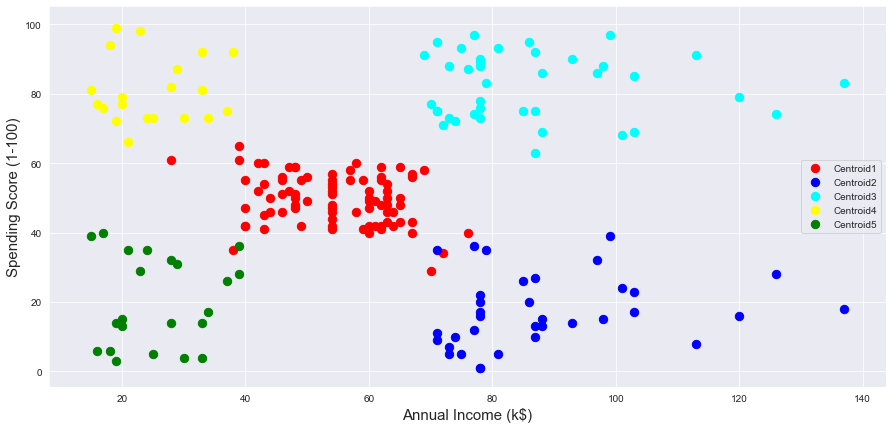

In [126]:
plt.figure(figsize=(15,7))
X1=X[X.pred==0]
X2=X[X.pred==1]
X3=X[X.pred==2]
X4=X[X.pred==3]
X5=X[X.pred==4]

plt.scatter(X1['Annual Income (k$)'],X1['Spending Score (1-100)'],s=70,label="Centroid1",color='red')
plt.scatter(X2['Annual Income (k$)'],X2['Spending Score (1-100)'],s=70,label="Centroid2",color='blue')
plt.scatter(X3['Annual Income (k$)'],X3['Spending Score (1-100)'],s=70,label="Centroid3",color='cyan')
plt.scatter(X4['Annual Income (k$)'],X4['Spending Score (1-100)'],s=70,label="Centroid4",color='yellow')
plt.scatter(X5['Annual Income (k$)'],X5['Spending Score (1-100)'],s=70,label="Centroid5",color='green')

plt.xlabel('Annual Income (k$)',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend()
plt.show()

In [153]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='euclidean')
y_hc=ag.fit_predict(X)

In [154]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [155]:
X['pred2']=y_hc

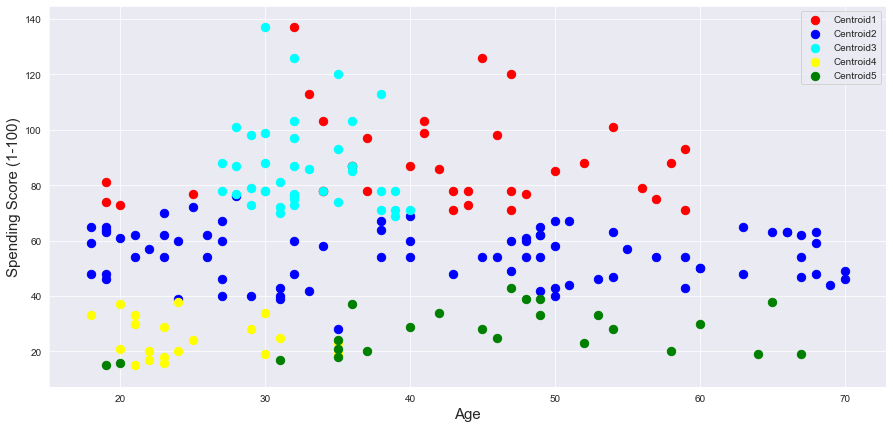

In [156]:
plt.figure(figsize=(15,7))
X1=X[X.pred2==0]
X2=X[X.pred2==1]
X3=X[X.pred2==2]
X4=X[X.pred2==3]
X5=X[X.pred2==4]

plt.scatter(X1['Age'],X1['Annual Income (k$)'],s=70,label="Centroid1",color='red')
plt.scatter(X2['Age'],X2['Annual Income (k$)'],s=70,label="Centroid2",color='blue')
plt.scatter(X3['Age'],X3['Annual Income (k$)'],s=70,label="Centroid3",color='cyan')
plt.scatter(X4['Age'],X4['Annual Income (k$)'],s=70,label="Centroid4",color='yellow')
plt.scatter(X5['Age'],X5['Annual Income (k$)'],s=70,label="Centroid5",color='green')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Spending Score (1-100)',fontsize=15)
plt.legend()
plt.show()